## Componentes
    Gleydvan Macedo
    João Vítor Venceslau Coelho
    
## Professor
    Ivanovitch Medeiros Dantas da Silva
    
## Descrição I
Criar gráficos Z-Score com a probabilidade da área em verde e relacionado com as notas da primeira, segunda, terceira unidades e média final das disciplinas: FMC I, FMC II e Probabilidade do BTI.

Para testes, escolha as notas 5.0, 7.0 e 9.0. Utilizar os dados disponibilizados em dados.ufrn.br

In [1]:
# Importando alguns módulos importantes
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# http://www.z-table.com/ <-- Site legal!

In [2]:
# Lendo os arquivos com os dados a serem analisados
matriculas_fmc1 = pd.read_csv("matriculas_fmc1.csv", sep = ";")
matriculas_fmc2 = pd.read_csv("matriculas_fmc2.csv", sep = ";")
matriculas_prob = pd.read_csv("matriculas_prob.csv", sep = ";")

In [3]:
# Função que simplifica o dataset informado
# Excluindo alguns dados não interessantes e deixando apenas as colunas interessantes
def simplifica_dataset ( data_set ):
    data_set = data_set[data_set["descricao"] != "EXCLUIDA"]
    data_set = data_set[data_set["descricao"] != "CANCELADO"]
    data_set = data_set[data_set["descricao"] != "TRANCADO"]
    data_set = data_set[data_set["descricao"] != "DESISTENCIA"]
    data_set = data_set[data_set["descricao"] != "INDEFERIDO"]
    data_set = data_set[["discente","descricao","unidade", "nota", "media_final"]]
    data_set = data_set.dropna()
    return data_set

In [4]:
# Simplificando os três datasets trabalhados
matriculas_fmc1 = simplifica_dataset( matriculas_fmc1 )
matriculas_fmc2 = simplifica_dataset( matriculas_fmc2 )
matriculas_prob = simplifica_dataset( matriculas_prob )

In [5]:
# Separando o dataset baseando-se nas três unidades de cada semestre
# FMC1
fmc1_u1 = matriculas_fmc1[matriculas_fmc1["unidade"] == 1]
fmc1_u2 = matriculas_fmc1[matriculas_fmc1["unidade"] == 2]
fmc1_u3 = matriculas_fmc1[matriculas_fmc1["unidade"] == 3]
# FMC2
fmc2_u1 = matriculas_fmc2[matriculas_fmc2["unidade"] == 1]
fmc2_u2 = matriculas_fmc2[matriculas_fmc2["unidade"] == 2]
fmc2_u3 = matriculas_fmc2[matriculas_fmc2["unidade"] == 3]
# Probabilidade
prob_u1 = matriculas_prob[matriculas_prob["unidade"] == 1]
prob_u2 = matriculas_prob[matriculas_prob["unidade"] == 2]
prob_u3 = matriculas_prob[matriculas_prob["unidade"] == 3]

In [6]:
# Função que calcula o desvio padrão de um conjunto de elementos ( Nesse caso: uma coluna de um dataset )
def calc_standard_deviation( alvo ):
    
    mean = alvo.mean()
    variances = [(i - mean) ** 2 for i in alvo]
    variance = sum(variances)/ len(variances)
    standard_deviation = variance ** (1/2)
    
    return standard_deviation

In [7]:
# Função que imprime um gráfico legal informando o cdf calculado a partir do conjunto de dados informado
# e do valor informado, a label informa o título do gráfico
def print_cool_graph( target, value, label_used ):

    ## points under study
    xi = value
    mean = target.mean()
    std = calc_standard_deviation( target )
    axis_x = range(0,100) # Para permitir notas do tipo 6,3 sejam representadas por um inteiro ( No caso: 63 )

    ## return the cumulative value from Z-Table
    cdf = stats.norm.cdf(xi,mean, std)
    
    ## find the probability distribution function
    pdf = stats.norm.pdf( axis_x, mean, std )

    ## - line, b -blue, D - diamond
    plt.plot( axis_x, pdf, '-bD', markevery=[] )
    
    ## Adiciona duas anotações ao gráfico, uma informa qual o valor utilizado no calculo do cdf
    ## e o outro o próprio cdf calculado
    plt.annotate('Value: '+str(value),xy=( 1,0.0011))
    plt.annotate('CDF: '+str(round(cdf,3)),xy=( 1,0.0001))
        
    ## The shaded area is cdf at xi
    plt.fill_between( axis_x[0:xi+1], pdf[0:xi+1], color = 'g', alpha = 0.5 )
    plt.title(label_used)
        
    return cdf

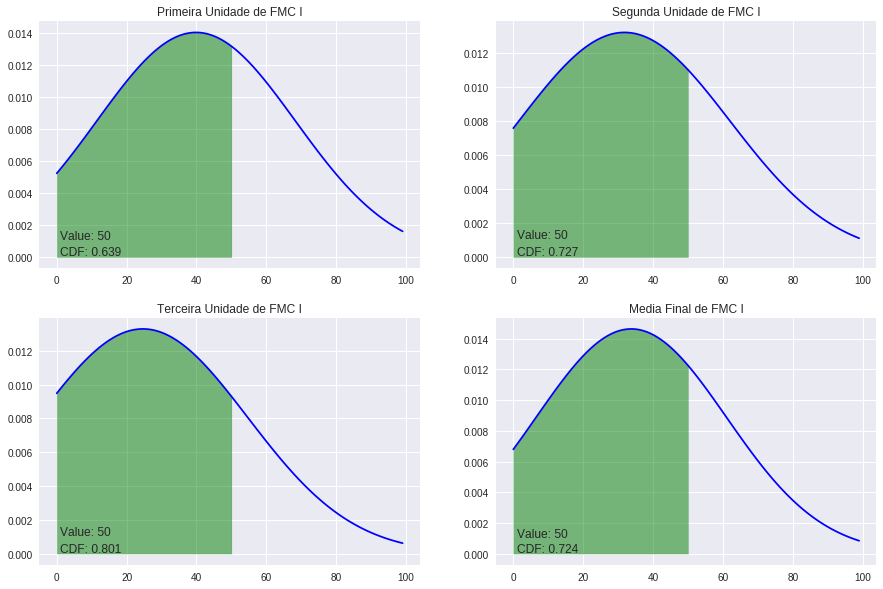

In [8]:
## Imprimindo os gŕaficos relativos a cada disciplina com os valores de teste 5,0 7,0 e 9,0 (50, 70 e 90)
## Cada cédula possui 4 gráficos relativos a uma disciplina e o com o cdf do valor de teste com os dados de 
## cada uma das 3 unidades e da média final

# Fechamos as figuras anteriores
plt.close('all')

# Criamos uma nova figura
fig1 = plt.figure(figsize=(15,10))

# Adicionamos 4 subplots ( (2,2,1), (2,2,2) (2,2,3) (2,2,4) )
# Imprimimos nos 3 primeiros subplots os gráficos das unidades 1 á 3, no último imprimimos o gráfico da média final
# Multiplicamos por 10 a coluna informada para a função para converter os valores do range (0,10) para (0,100)
fig1.add_subplot(2,2,1)
(print_cool_graph( 10*fmc1_u1["nota"] , 50 , "Primeira Unidade de FMC I"))
fig1.add_subplot(2,2,2)
(print_cool_graph( 10*fmc1_u2["nota"] , 50 ,"Segunda Unidade de FMC I"))
fig1.add_subplot(2,2,3)
(print_cool_graph( 10*fmc1_u3["nota"] , 50 ,"Terceira Unidade de FMC I"))
fig1.add_subplot(2,2,4)
(print_cool_graph( 10*fmc1_u1["media_final"] , 50,"Media Final de FMC I" ))

fig1

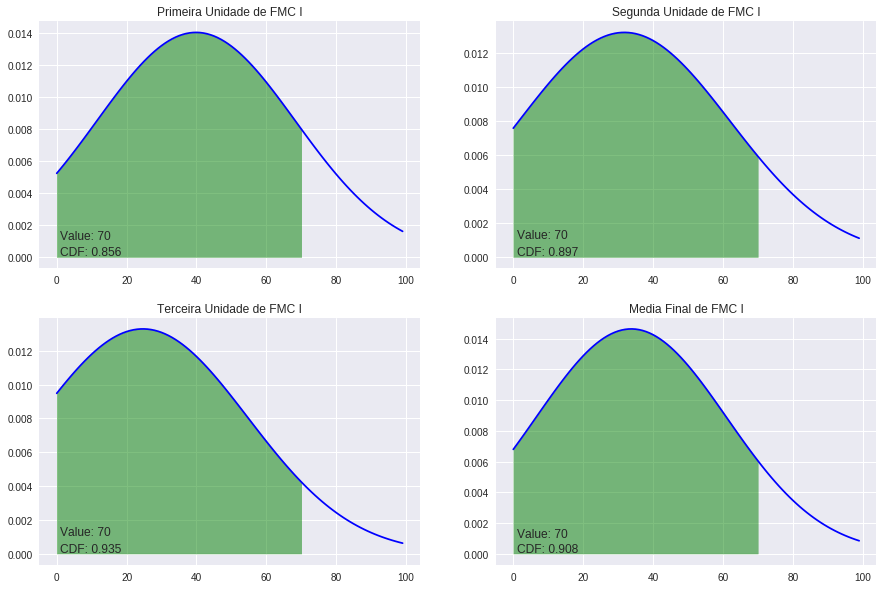

In [9]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

fig1.add_subplot(2,2,1)
(print_cool_graph( 10*fmc1_u1["nota"] , 70 , "Primeira Unidade de FMC I"))
fig1.add_subplot(2,2,2)
(print_cool_graph( 10*fmc1_u2["nota"] , 70 ,"Segunda Unidade de FMC I"))
fig1.add_subplot(2,2,3)
(print_cool_graph( 10*fmc1_u3["nota"] , 70 ,"Terceira Unidade de FMC I"))
fig1.add_subplot(2,2,4)
(print_cool_graph( 10*fmc1_u1["media_final"] , 70,"Media Final de FMC I" ))

fig1

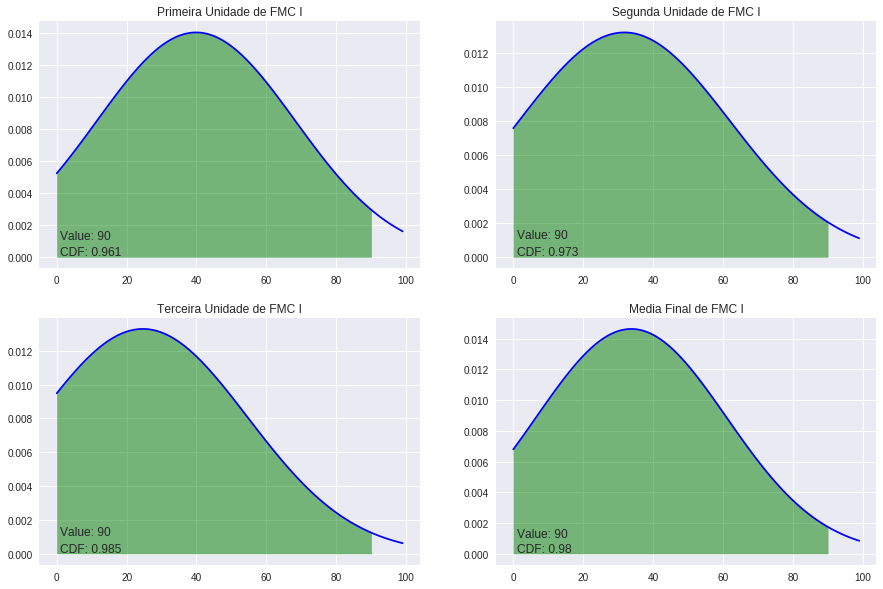

In [10]:
plt.close('all')

fig1 = plt.figure(figsize=(15,10))

fig1.add_subplot(2,2,1)
(print_cool_graph( 10*fmc1_u1["nota"] , 90 , "Primeira Unidade de FMC I"))
fig1.add_subplot(2,2,2)
(print_cool_graph( 10*fmc1_u2["nota"] , 90 ,"Segunda Unidade de FMC I"))
fig1.add_subplot(2,2,3)
(print_cool_graph( 10*fmc1_u3["nota"] , 90 ,"Terceira Unidade de FMC I"))
fig1.add_subplot(2,2,4)
(print_cool_graph( 10*fmc1_u1["media_final"] , 90,"Media Final de FMC I" ))

fig1

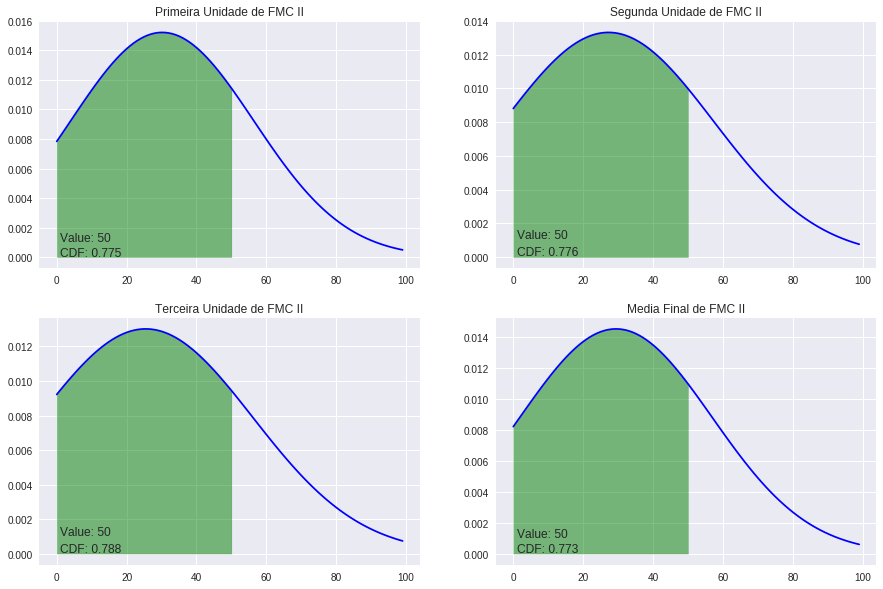

In [11]:
plt.close('all')

fig2 = plt.figure(figsize=(15,10))

fig2.add_subplot(2,2,1)
(print_cool_graph( 10*fmc2_u1["nota"] , 50 ,"Primeira Unidade de FMC II"))
fig2.add_subplot(2,2,2)
(print_cool_graph( 10*fmc2_u2["nota"] , 50 ,"Segunda Unidade de FMC II"))
fig2.add_subplot(2,2,3)
(print_cool_graph( 10*fmc2_u3["nota"] , 50 ,"Terceira Unidade de FMC II"))
fig2.add_subplot(2,2,4)
(print_cool_graph( 10*fmc2_u1["media_final"] , 50 ,"Media Final de FMC II"))

fig2

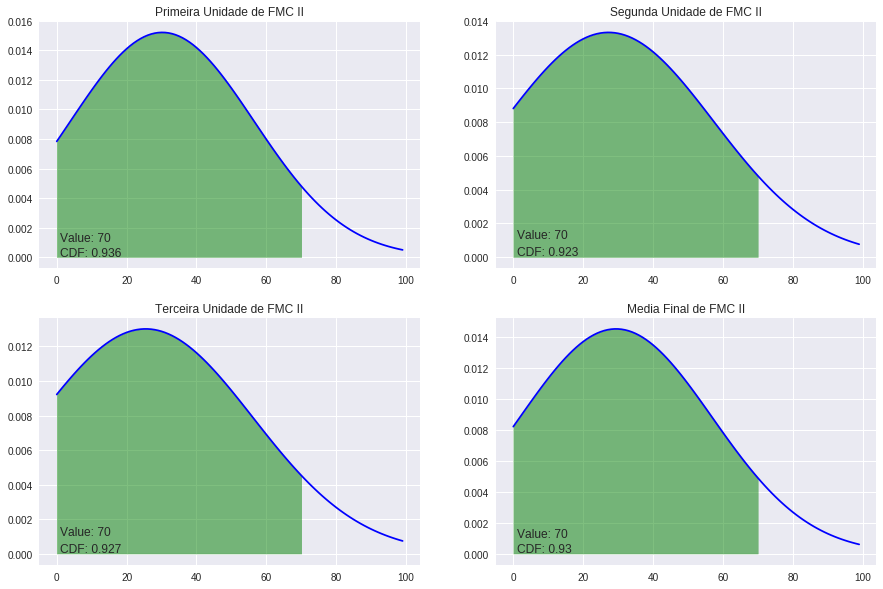

In [12]:
plt.close('all')

fig2 = plt.figure(figsize=(15,10))

fig2.add_subplot(2,2,1)
(print_cool_graph( 10*fmc2_u1["nota"] , 70 ,"Primeira Unidade de FMC II"))
fig2.add_subplot(2,2,2)
(print_cool_graph( 10*fmc2_u2["nota"] , 70 ,"Segunda Unidade de FMC II"))
fig2.add_subplot(2,2,3)
(print_cool_graph( 10*fmc2_u3["nota"] , 70 ,"Terceira Unidade de FMC II"))
fig2.add_subplot(2,2,4)
(print_cool_graph( 10*fmc2_u1["media_final"] , 70 ,"Media Final de FMC II"))

fig2

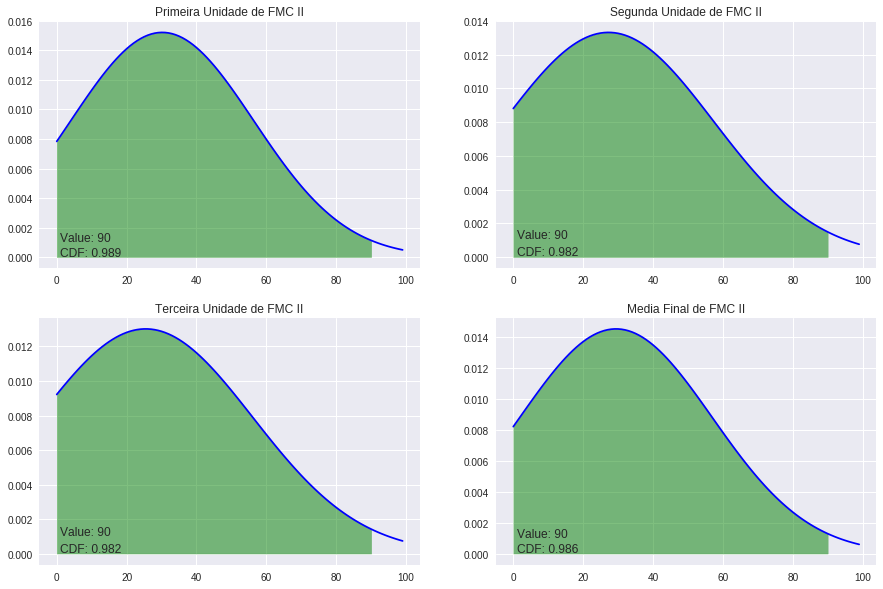

In [13]:
plt.close('all')

fig2 = plt.figure(figsize=(15,10))

fig2.add_subplot(2,2,1)
(print_cool_graph( 10*fmc2_u1["nota"] , 90 ,"Primeira Unidade de FMC II"))
fig2.add_subplot(2,2,2)
(print_cool_graph( 10*fmc2_u2["nota"] , 90 ,"Segunda Unidade de FMC II"))
fig2.add_subplot(2,2,3)
(print_cool_graph( 10*fmc2_u3["nota"] , 90 ,"Terceira Unidade de FMC II"))
fig2.add_subplot(2,2,4)
(print_cool_graph( 10*fmc2_u1["media_final"] , 90 ,"Media Final de FMC II"))

fig2

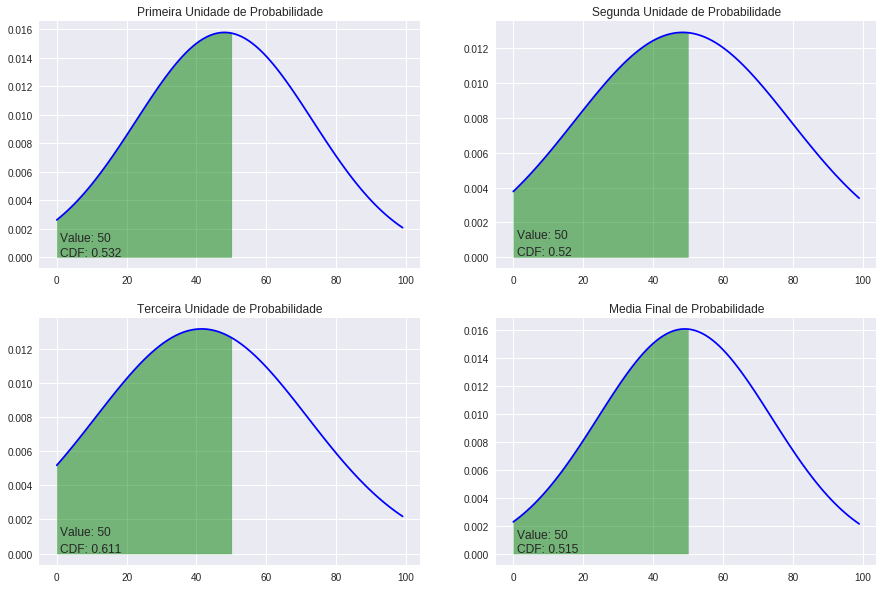

In [16]:
plt.close('all')

fig3 = plt.figure(figsize=(15,10))

fig3.add_subplot(2,2,1)
(print_cool_graph( 10*prob_u1["nota"] , 50, "Primeira Unidade de Probabilidade"))
fig3.add_subplot(2,2,2)
(print_cool_graph( 10*prob_u2["nota"] , 50, "Segunda Unidade de Probabilidade"))
fig3.add_subplot(2,2,3)
(print_cool_graph( 10*prob_u3["nota"] , 50, "Terceira Unidade de Probabilidade"))
fig3.add_subplot(2,2,4)
(print_cool_graph( 10*prob_u1["media_final"] , 50 , "Media Final de Probabilidade"))

fig3

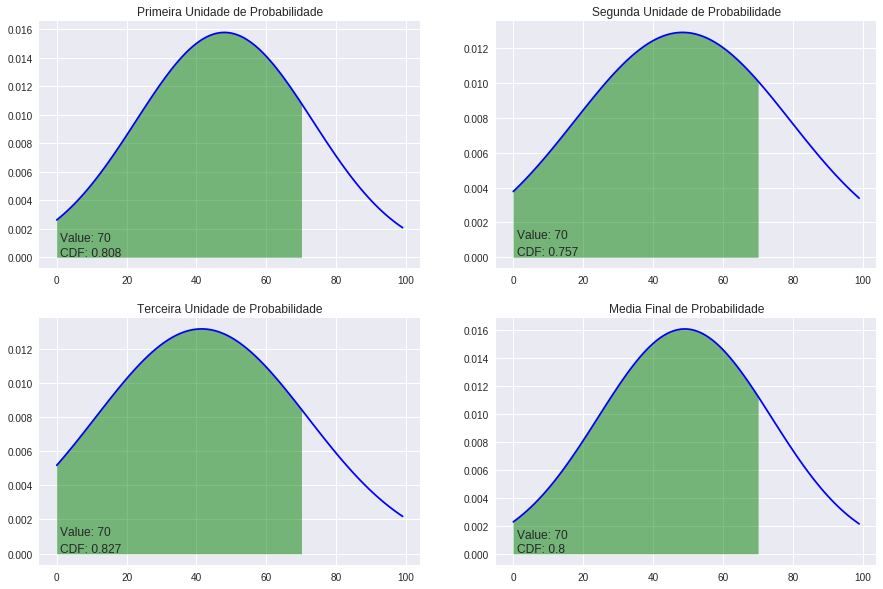

In [17]:
plt.close('all')

fig3 = plt.figure(figsize=(15,10))

fig3.add_subplot(2,2,1)
(print_cool_graph( 10*prob_u1["nota"] , 70, "Primeira Unidade de Probabilidade"))
fig3.add_subplot(2,2,2)
(print_cool_graph( 10*prob_u2["nota"] , 70, "Segunda Unidade de Probabilidade"))
fig3.add_subplot(2,2,3)
(print_cool_graph( 10*prob_u3["nota"] , 70, "Terceira Unidade de Probabilidade"))
fig3.add_subplot(2,2,4)
(print_cool_graph( 10*prob_u1["media_final"] , 70 , "Media Final de Probabilidade"))

fig3

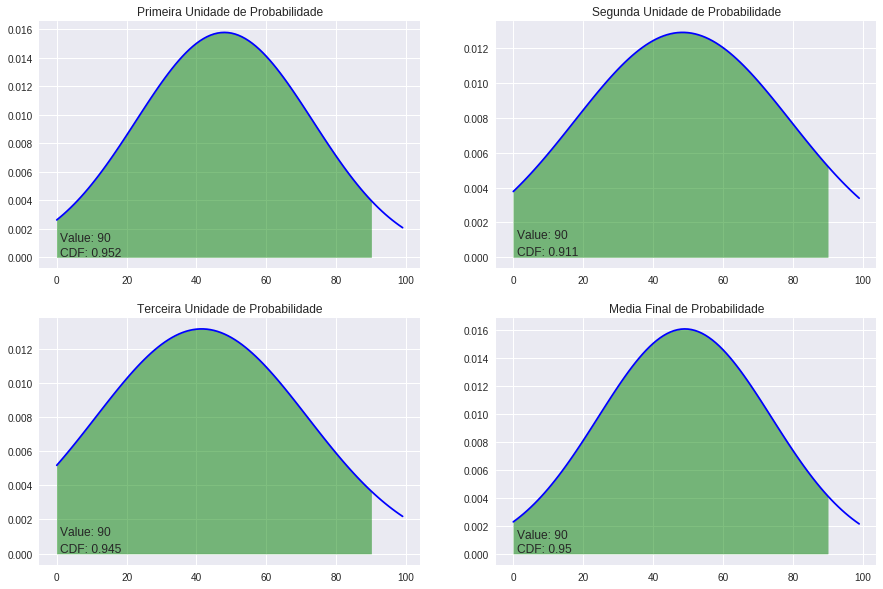

In [18]:
plt.close('all')

fig3 = plt.figure(figsize=(15,10))

fig3.add_subplot(2,2,1)
(print_cool_graph( 10*prob_u1["nota"] , 90, "Primeira Unidade de Probabilidade"))
fig3.add_subplot(2,2,2)
(print_cool_graph( 10*prob_u2["nota"] , 90, "Segunda Unidade de Probabilidade"))
fig3.add_subplot(2,2,3)
(print_cool_graph( 10*prob_u3["nota"] , 90, "Terceira Unidade de Probabilidade"))
fig3.add_subplot(2,2,4)
(print_cool_graph( 10*prob_u1["media_final"] , 90 , "Media Final de Probabilidade"))

fig3